                                Apple Music Data Analysis by
                                      Angel Robinson

## Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Top_Contentdf = pd.read_csv('Apple_Music_Top_Content_copy.csv')
Top_Contentdf




,Country,Artist Name,Play Duration Minutes,Rankings
0,United States,11:11,110.4,72
1,United States,1PLAYY,11.4,221
2,United States,2 Chainz,5.1,271
3,United States,21 Lil Harold,0.7,386
4,United States,21 Savage,750.6,15
...,...,...,...,...
419,United States,Yung Bleu,66.7,97
420,United States,Yung L.A.,2.1,361
421,United States,Yung Sinn,5.7,264
422,United States,Zapp & Roger,4.1,299


In [2]:
Play_Hdf = pd.read_excel('Apple Music Playlist_History Clean Python 1-30.xlsx',index_col = 'Track Identifier')
Play_Hdf

,Date Played,Play Duration Minutes,Play Count,Skip Count,Artist Name,Song Name,Featured Artists
Track Identifier,,,,,,,
1,2016-04-13,14.43,6,2,Chris Brown,Discover,NaN
2,2016-04-13,14.35,6,2,Rihanna,Consideration,SZA
3,2016-04-13,14.12,8,2,Rihanna,Desperado,NaN
4,2016-04-13,14.08,6,3,Ro James,Permission,NaN
5,2016-04-13,12.25,6,2,Bryson Tiller,Right My Wrongs,NaN
...,...,...,...,...,...,...,...
882,2023-11-10,3.97,2,3,Chris Brown,Need A Friend,NaN
883,2023-11-10,3.75,2,5,Chris Brown,Messed Up,NaN
884,2023-11-10,3.47,2,7,Chris Brown,Midnight Freak,NaN


In [3]:
Play_Hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 1 to 886
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date Played            886 non-null    datetime64[ns]
 1   Play Duration Minutes  886 non-null    float64       
 2   Play Count             886 non-null    int64         
 3   Skip Count             886 non-null    int64         
 4   Artist Name            886 non-null    object        
 5   Song Name              885 non-null    object        
 6   Featured Artists       281 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 55.4+ KB


## DATA CLEANING  

In [4]:
Play_Hdf.isnull().sum()

Date Played                0
Play Duration Minutes      0
Play Count                 0
Skip Count                 0
Artist Name                0
Song Name                  1
Featured Artists         605
dtype: int64

In [5]:
# FILL NULL VALUES WITH 'none'
Play_Hdf['Featured Artists'] = Play_Hdf['Featured Artists'].fillna("none")

In [6]:
# CHECK featured artists COLUMN
Play_Hdf['Featured Artists']

Track Identifier
1      none
2       SZA
3      none
4      none
5      none
       ... 
882    none
883    none
884    none
885    none
886    none
Name: Featured Artists, Length: 886, dtype: object

In [7]:
# create the Year played column from the Date Played column
Year_Played = Play_Hdf['Date Played'].astype(str).str[:4]
Year_Played

Track Identifier
1      2016
2      2016
3      2016
4      2016
5      2016
       ... 
882    2023
883    2023
884    2023
885    2023
886    2023
Name: Date Played, Length: 886, dtype: object

In [8]:
# insert the new column into the dataframe
Play_Hdf.insert(loc = 2,column= 'Year Played', value = Year_Played)


In [9]:
Play_Hdf

,Date Played,Play Duration Minutes,Year Played,Play Count,Skip Count,Artist Name,Song Name,Featured Artists
Track Identifier,,,,,,,,
1,2016-04-13,14.43,2016,6,2,Chris Brown,Discover,none
2,2016-04-13,14.35,2016,6,2,Rihanna,Consideration,SZA
3,2016-04-13,14.12,2016,8,2,Rihanna,Desperado,none
4,2016-04-13,14.08,2016,6,3,Ro James,Permission,none
5,2016-04-13,12.25,2016,6,2,Bryson Tiller,Right My Wrongs,none
...,...,...,...,...,...,...,...,...
882,2023-11-10,3.97,2023,2,3,Chris Brown,Need A Friend,none
883,2023-11-10,3.75,2023,2,5,Chris Brown,Messed Up,none
884,2023-11-10,3.47,2023,2,7,Chris Brown,Midnight Freak,none


## DATA VISUALIZATIONS & QUESTIONS
- Most played song in the year 2016
- TOP 10 most played songs based on play duration in minutes
- Top 3 artist with the most songs in Library
- Top 5 artists with the most skipped songs based on skip count.
- Most popular genre based on amount of dowloaded songs from artist
- Average number of songs played in a day

###  MOST PLAYED SONG IN THE YEAR 2016


In [91]:
y2016_songs = Play_Hdf[Play_Hdf['Year Played'] == '2016']
y2016_songs.sort_values('Play Count', ascending = False).head(10)


,Date Played,Play Duration Minutes,Year Played,Play Count,Skip Count,Artist Name,Song Name,Featured Artists
Track Identifier,,,,,,,,
20,2016-04-14,17.67,2016,10,1,Rihanna,Close to You,none
65,2016-05-20,17.83,2016,9,4,Ariana Grande,I Don't Care,none
76,2016-09-03,18.70,2016,9,2,Maxwell,Whenever Wherever Whatever ( Remastered 2021),none
3,2016-04-13,14.12,2016,8,2,Rihanna,Desperado,none
57,2016-05-05,22.30,2016,8,3,Chris Brown,Grass Ain't Greener,none
58,2016-05-06,16.60,2016,7,2,Bob,Shawty Swing My Way,none
68,2016-05-20,6.82,2016,7,2,Fantasia,I Believe,none
1,2016-04-13,14.43,2016,6,2,Chris Brown,Discover,none
4,2016-04-13,14.08,2016,6,3,Ro James,Permission,none


### TOP 10 MOST PLAYED SONGS BASED ON PLAY DURATION 
 

In [12]:
top_songs = Play_Hdf.loc[:,['Play Duration Minutes','Song Name']].sort_values('Play Duration Minutes',ascending = False).head(10)
top_songs

,Play Duration Minutes,Song Name
Track Identifier,,
270,299.10,Fan
216,45.68,Hope You Do
781,30.90,WE (Warm Embrace)
571,29.07,Callin'
623,27.47,Wasn't Love
662,27.00,Pussy Fairy
506,23.52,Off My Chest
57,22.30,Grass Ain't Greener
589,22.16,Stretch You Out


<Axes: title={'center': 'Top 10 Most Played Songs'}, xlabel='Song Name', ylabel='Play Duration in Minutes'>

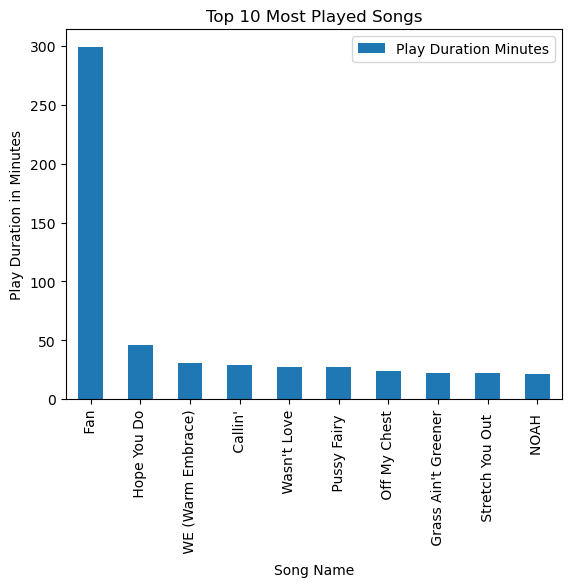

In [90]:
top_songs_plot = top_songs.plot(x = 'Song Name', y = 'Play Duration Minutes', kind = 'bar',
                  xlabel='Song Name',ylabel='Play Duration in Minutes', title = 'Top 10 Most Played Songs')
top_songs_plot



### Top 3 artist with the most songs in Library


In [13]:
Play_Hdf.value_counts('Artist Name').head(3)

Artist Name
Chris Brown       82
Summer Walker     35
Key Glock         34
dtype: int64

### Top 5 artists with the most skipped songs based on skip count.


In [14]:

skipped_songs = Play_Hdf.loc[:,['Play Count','Skip Count','Artist Name']].sort_values(by= 'Skip Count').head(5)
skipped_songs

test = Play_Hdf[(Play_Hdf['Play Count'] < 4)&(Play_Hdf['Skip Count'] > 3)]
test.head(5)

,Date Played,Play Duration Minutes,Year Played,Play Count,Skip Count,Artist Name,Song Name,Featured Artists
Track Identifier,,,,,,,,
46,2016-04-29,5.88,2016,2,4,Drake,Redemption,none
47,2016-04-29,5.72,2016,2,4,Drake,U With Me?,none
69,2016-05-20,5.35,2016,3,7,Ariana Grande,Tattooed Heart,none
70,2016-05-20,4.08,2016,2,4,Ariana Grande,Knew Better / Forever Boy,none
110,2017-03-08,4.86,2017,2,5,Trey Songz,Song Goes Off,none


### Most popular genre

In [41]:
# extract genres from the Top Content DataFrame

pd.set_option('display.max_rows', 500)

In [42]:
Top_Contentdf.sort_values(by = 'Play Duration Minutes', ascending= False )


,Country,Artist Name,Play Duration Minutes,Rankings
304,United States,R&B/Soul,32265.0,1
159,United States,Hip Hop/Rap,10456.8,2
74,United States,Chris Brown,4839.3,1
345,United States,Summer Walker,3305.4,2
210,United States,Key Glock,2207.8,3
149,United States,GIVEON,1697.1,4
156,United States,H.E.R.,1326.4,5
399,United States,Victoria Monet,1233.1,6
182,United States,Jhene Aiko,1209.0,7
414,United States,Young Dolph,1175.8,8


In [84]:
# extract the genres from the top content df
genres = Top_Contentdf[(Top_Contentdf.index == 304) | (Top_Contentdf.index == 305)|(Top_Contentdf.index == 22)|(Top_Contentdf.index == 298)
              |(Top_Contentdf.index == 179)|(Top_Contentdf.index == 75)|(Top_Contentdf.index == 159)| (Top_Contentdf.index == 12)]
# change artist name to genre
genres.rename(columns = {'Artist Name': 'Genres'},inplace = True)

# drop ranking column
genres.drop(labels = 'Rankings', axis = 1,inplace = True)

# find top genre based on Play Duration in Minutes
genres.sort_values(by = 'Play Duration Minutes', ascending = False)

C:\Users\angel\AppData\Local\Temp\ipykernel_16416\3127842421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres.rename(columns = {'Artist Name': 'Genres'},inplace = True)
C:\Users\angel\AppData\Local\Temp\ipykernel_16416\3127842421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres.drop(labels = 'Rankings', axis = 1,inplace = True)


,Country,Genres,Play Duration Minutes
304,United States,R&B/Soul,32265.0
159,United States,Hip Hop/Rap,10456.8
298,United States,Pop,1136.9
305,United States,Rap,327.1
22,United States,Alternative,275.1
12,United States,Afrobeats,33.2
179,United States,Jazz,25.4
75,United States,Christian & Gospel,0.6


<Axes: title={'center': 'Popular Genres'}, xlabel='Genres', ylabel='Play Duration Minutes'>

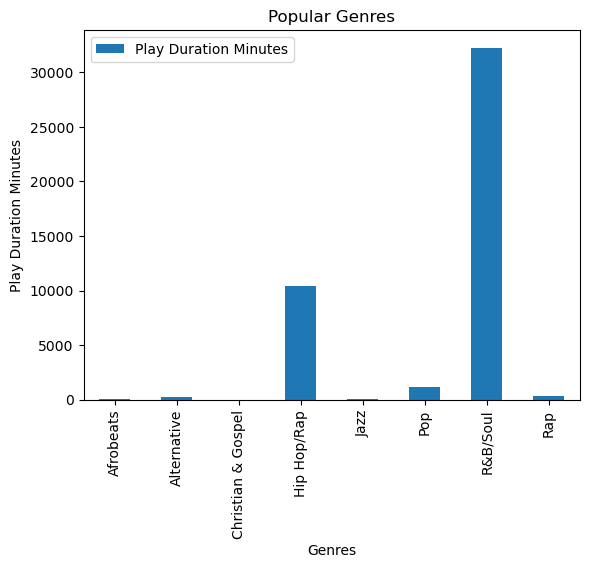

In [85]:
genres.plot(x='Genres',y='Play Duration Minutes',kind = 'bar',title = 'Popular Genres',
            xlabel='Genres',ylabel='Play Duration Minutes')

### Average number of songs played per day

In [63]:
Play_Hdf

,Date Played,Play Duration Minutes,Year Played,Play Count,Skip Count,Artist Name,Song Name,Featured Artists
Track Identifier,,,,,,,,
1,2016-04-13,14.43,2016,6,2,Chris Brown,Discover,none
2,2016-04-13,14.35,2016,6,2,Rihanna,Consideration,SZA
3,2016-04-13,14.12,2016,8,2,Rihanna,Desperado,none
4,2016-04-13,14.08,2016,6,3,Ro James,Permission,none
5,2016-04-13,12.25,2016,6,2,Bryson Tiller,Right My Wrongs,none
...,...,...,...,...,...,...,...,...
882,2023-11-10,3.97,2023,2,3,Chris Brown,Need A Friend,none
883,2023-11-10,3.75,2023,2,5,Chris Brown,Messed Up,none
884,2023-11-10,3.47,2023,2,7,Chris Brown,Midnight Freak,none


In [79]:
average_songs_pday = Play_Hdf['Date Played'].value_counts().mean().round()
print(f"There are {average_songs_pday} played per day from 2016-2023")

There are 2.0 played per day from 2016-2023


#### Songs Played per Year

<Axes: title={'center': 'Songs Played per Year'}, xlabel='Years', ylabel='Number of Songs Played'>

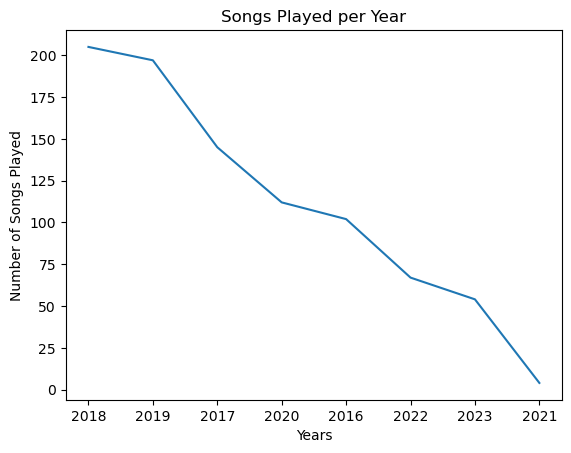

In [89]:
songs_peryear = Play_Hdf['Year Played'].value_counts()
songs_peryear.plot(title='Songs Played per Year',xlabel='Years',ylabel='Number of Songs Played')